In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
import math

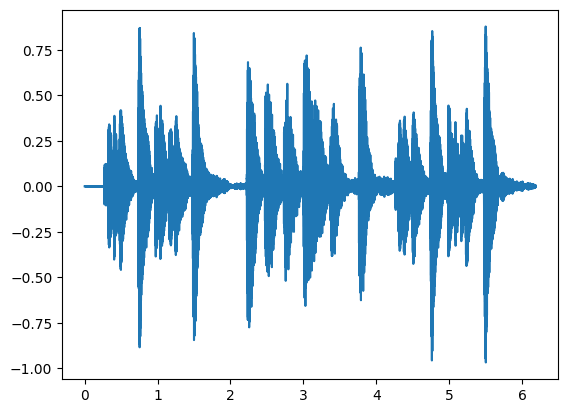

In [2]:
pdata,srp = sf.read("Piano.ogg")
piano_time = (np.arange(len(pdata)))/(srp)
plt.plot(piano_time,pdata[:,1])

In [4]:
pfreqdata = np.fft.fft(pdata[:,1])
Np = len(pfreqdata)
sr_p = srp/Np
freq_p = np.arange(Np)*sr_p

In [7]:
t_hum = 1/10  #1/2 of lower freq limit (in seconds)
Nmin = t_hum*srp
Nwin = int(2**(math.ceil(np.log2(Nmin))-1))  #To make the algorithm 2**n
s = 4 #slide
Ns = math.floor((Np-Nwin)/(Nwin/s))  #Number of windows

pianos = np.zeros((Nwin,Ns),dtype='complex')

In [8]:
#window = np.ones(Nwin)
window = np.hamming(Nwin)
#window = np.hanning(Nwin)

In [9]:
for i in range(Ns-1):
    pianos[:,i] = np.fft.fft(pdata[:,1][i*int(Nwin/s):(i*int(Nwin/s))+Nwin] * window)

/tmp/ipykernel_697/1503651024.py:2: RuntimeWarning: divide by zero encountered in log
  ax.pcolorfast(10*np.log(np.abs(pianos)))   #log scale (in decibels)


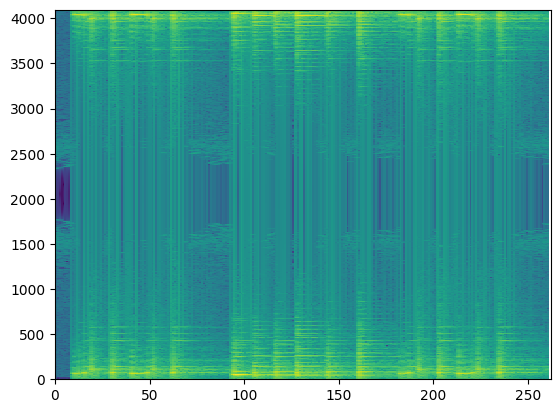

In [10]:
fig,ax = plt.subplots()
ax.pcolorfast(10*np.log(np.abs(pianos)))   #log scale (in decibels)

/tmp/ipykernel_697/2617198413.py:4: RuntimeWarning: divide by zero encountered in log
  ax.pcolorfast(timesp,freqsp,10*np.log(np.abs(pianos)),vmin=-80)


(0.0, 10000.0)

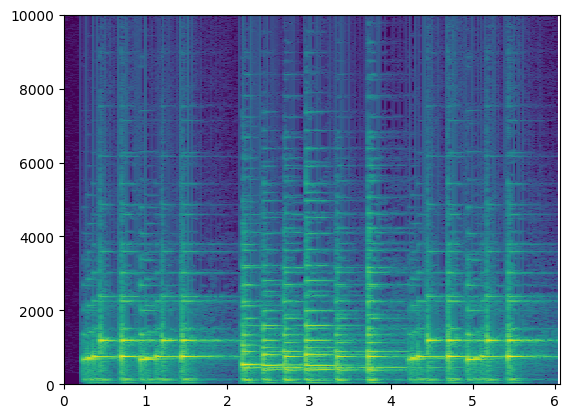

In [11]:
freqsp = np.arange(Nwin)*srp/Nwin
timesp = np.arange(Ns)*Nwin/(s*srp)
fig,ax = plt.subplots()
ax.pcolorfast(timesp,freqsp,10*np.log(np.abs(pianos)),vmin=-80)
ax.set_ylim(0,10000)

In [40]:
f4 = 442
freqs = []
r = 2**(1/12)
for i in range(13):
    si = f4*(r**i)
    freqs.append(si)
freqs

[442.0,
 468.28268770680853,
 496.1282253527429,
 525.6295448312028,
 556.8851040535341,
 589.9992155431553,
 625.0823945689082,
 662.2517279794935,
 701.6312649699444,
 743.3524310842839,
 787.5544668360603,
 834.3848924106175,
 884.0000000000003]

In [41]:
notenames = ['f4','a','a#','b','c','c#','d','d#','e','f','f#','g','g#']
notes = {}
count = 0
for i in notenames:
    notes[i] = freqs[count]
    count+=1
notes

{'f4': 442.0,
 'a': 468.28268770680853,
 'a#': 496.1282253527429,
 'b': 525.6295448312028,
 'c': 556.8851040535341,
 'c#': 589.9992155431553,
 'd': 625.0823945689082,
 'd#': 662.2517279794935,
 'e': 701.6312649699444,
 'f': 743.3524310842839,
 'f#': 787.5544668360603,
 'g': 834.3848924106175,
 'g#': 884.0000000000003}

/tmp/ipykernel_697/832000669.py:4: RuntimeWarning: divide by zero encountered in log
  ax.pcolorfast(timesp,freqsp,10*np.log(np.abs(pianos)),vmin=-80)


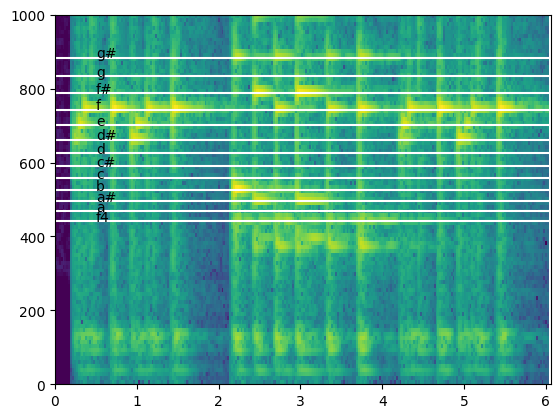

In [44]:
freqsp = np.arange(Nwin)*srp/Nwin
timesp = np.arange(Ns)*Nwin/(s*srp)
fig,ax = plt.subplots()
ax.pcolorfast(timesp,freqsp,10*np.log(np.abs(pianos)),vmin=-80)
ax.set_ylim(0,1000)
for i in range(13):
    ax.axhline(freqs[i],color='w')
    ax.text(0.5,freqs[i]+0.1,notenames[i])